In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install wordcloud

In [3]:
from wordcloud import WordCloud

In [4]:
data=pd.read_csv("emails.csv")

In [5]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
print(len(data[data["spam"]==1]==True))
print(len(data[data["spam"]==0]==True))

1368
4360


In [7]:
data.shape

(5728, 2)

In [8]:
data=data.drop_duplicates()

In [9]:
#Before and after dropping uplicates
data.shape

(5695, 2)

Data Preprocessing:

In [10]:
import nltk
import string
import re

In [11]:
stopword= nltk.corpus.stopwords.words("english")
Punctuation=string.punctuation

In [12]:

clean_data=[]

for sen in data["text"]:
    
    #converting into lower case:
    sen=sen.lower()
    
    #removing numbers and special characters:
    sen=re.sub("(\\d|\\W)+"," ",sen)    
    
    #remove punctuation
    sen = re.sub('[^a-zA-Z]', ' ', sen)
    
    #remove tags
    sen=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",sen)
    
    clean_data.append(sen)

In [13]:
data["text"]=clean_data

In [14]:
data.head(3)

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1


In [15]:
stopword.append("subject")

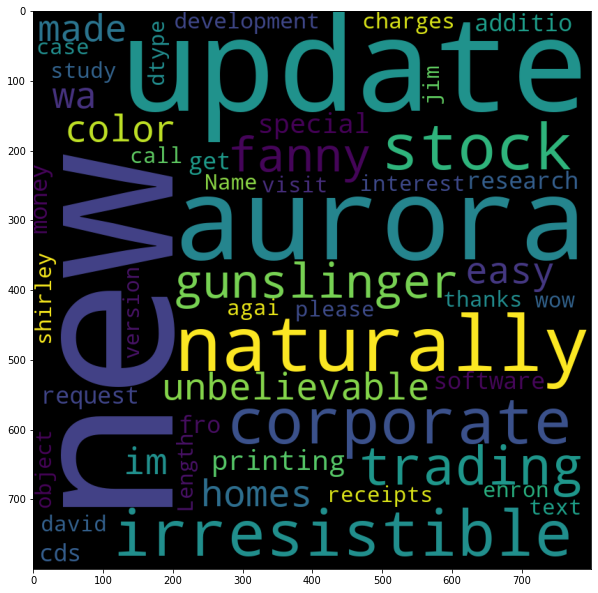

In [16]:
word_cloud= WordCloud(width=800, height=800, background_color='black', 
                      stopwords= stopword, max_words=5000, 
                      min_font_size=2).generate(str(data["text"]))

#plot the wordcloud
fig=plt.figure(figsize=(10,12), facecolor=None)
plt.imshow(word_cloud)

plt.show()

In [17]:
from PIL import Image

(1000, 987)


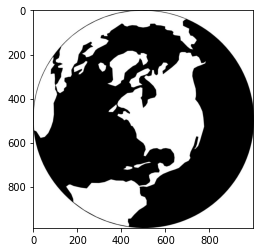

In [44]:
img=Image.open("earth.jpg")
print(img.size)
plt.imshow(img)

In [45]:
mask=np.array(img)

In [46]:
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

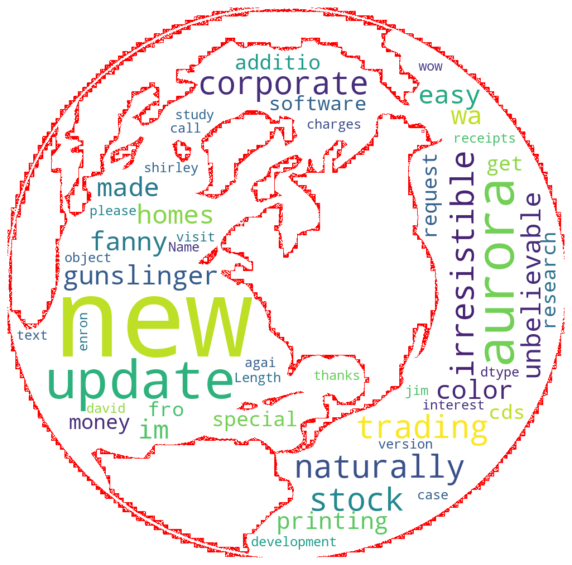

In [49]:
word_cloud= WordCloud(width=800, height=800, mask=mask, background_color='white',  
                      stopwords= stopword, max_words=5000,
                      min_font_size=12, max_font_size=1000,
                      contour_width=1, contour_color='red').generate(str(data["text"]))


#plot the wordcloud
fig=plt.figure(figsize=(10,12), facecolor=None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()